In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
%matplotlib inline

**Import dataset & visualization**

In [49]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [38]:
train.head(2)

,ID,Title,Domain
0,1,"What is good in a decision tree, a large or a ...",Techniques
1,2,Training data only contains single positive label,Techniques


In [39]:
test.head(2)

,ID,Title
0,3846,Spark Cheatsheet
1,3847,Review of Random forest code in Python


In [40]:
print('train shape:', train.shape, '; test shape:', test.shape)

train shape: (3845, 3) ; test shape: (1649, 2)


In [41]:
train['Domain'].unique()

array(['Techniques', 'Hackathons', 'Misc', 'Tools', 'Career', 'Resources',
       'Other'], dtype=object)

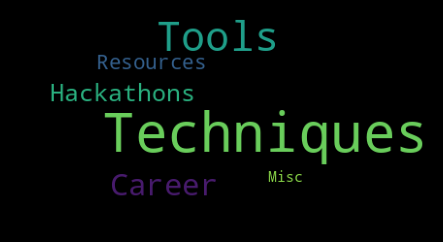

In [42]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(' '.join(train['Domain'].tolist()))
plt.figure( figsize=(5,7), facecolor='k' )
plt.imshow( wordcloud )

In [43]:
train.isna().sum()

ID         0
Title     11
Domain     0
dtype: int64

In [50]:
train.dropna(axis=0, inplace=True)

In [51]:
train['Labels'] = train['Domain'].map({'Techniques': 0,
                                       'Hackathons': 1,
                                       'Misc': 2,
                                       'Tools': 3,
                                       'Career': 4,
                                       'Resources':5,
                                       'Other':6})

In [62]:
train.sample(5)

,ID,Title,Domain,Labels
2977,2978,Milestones while learning data science,Misc,2
973,974,What should I learn? R or Python?,Tools,3
2417,2418,Analytics Interview Question,Career,4
3187,3188,How to convert date into days in R?,Tools,3
2947,2948,ZS Associates or Mu-Sigma? For a beginner in a...,Career,4


**Splitting**

In [65]:
y = tf.keras.utils.to_categorical( train['Labels'].values, num_classes=len(train["Domain"].value_counts()) )
x_train, x_test, y_train, y_test = train_test_split( train['Title'], y, test_size=0.25 )

In [66]:
len(x_train), len(x_test), len(y_train), len(y_test)

(2875, 959, 2875, 959)

In [72]:
for i in range(1, 6):
  print(x_train[i-1:i], y_train[i-1:i])
  print('--------------------------')

1408    How to proceed with analysis from a single dat...
Name: Title, dtype: object [[1. 0. 0. 0. 0. 0. 0.]]
--------------------------
675    Can we use Qlikview Objects and Metrics in pow...
Name: Title, dtype: object [[0. 0. 0. 1. 0. 0. 0.]]
--------------------------
1444    Course in python like analytics Edge for R
Name: Title, dtype: object [[0. 0. 0. 1. 0. 0. 0.]]
--------------------------
268    How to hide the default column numbers in R wh...
Name: Title, dtype: object [[0. 0. 0. 1. 0. 0. 0.]]
--------------------------
2249    Question on fFne-Tuning BERT for Text Classifi...
Name: Title, dtype: object [[1. 0. 0. 0. 0. 0. 0.]]
--------------------------
